# Modelo 1: Regressão Linear — Previsão do Preço de Casas na Califórnia

## Carregamento e Exploração dos Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [ ]:
# Carregando o dataset
california_housing = fetch_california_housing()
df_housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df_housing['MedHouseVal'] = california_housing.target  # Valor médio das casas

In [ ]:
# Visualizando as primeiras linhas
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Informações gerais do dataset
print("Formato do dataset:", df_housing.shape)
print("\nDescrição das variáveis:")
print(california_housing.DESCR)

Formato do dataset: (20640, 9)

Descrição das variáveis:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset wa

## Análise Exploratória dos Dados

In [ ]:
# Estatísticas descritivas
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Verificando valores ausentes
print("Valores ausentes por variável:")
print(df_housing.isnull().sum())

Valores ausentes por variável:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Text(0, 0.5, 'Frequência')

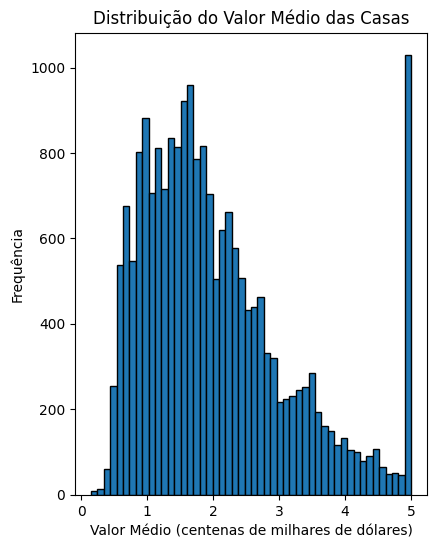

In [ ]:
# Distribuição da variável alvo
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df_housing['MedHouseVal'], bins=50, edgecolor='black')
plt.title('Distribuição do Valor Médio das Casas')
plt.xlabel('Valor Médio (centenas de milhares de dólares)')
plt.ylabel('Frequência')

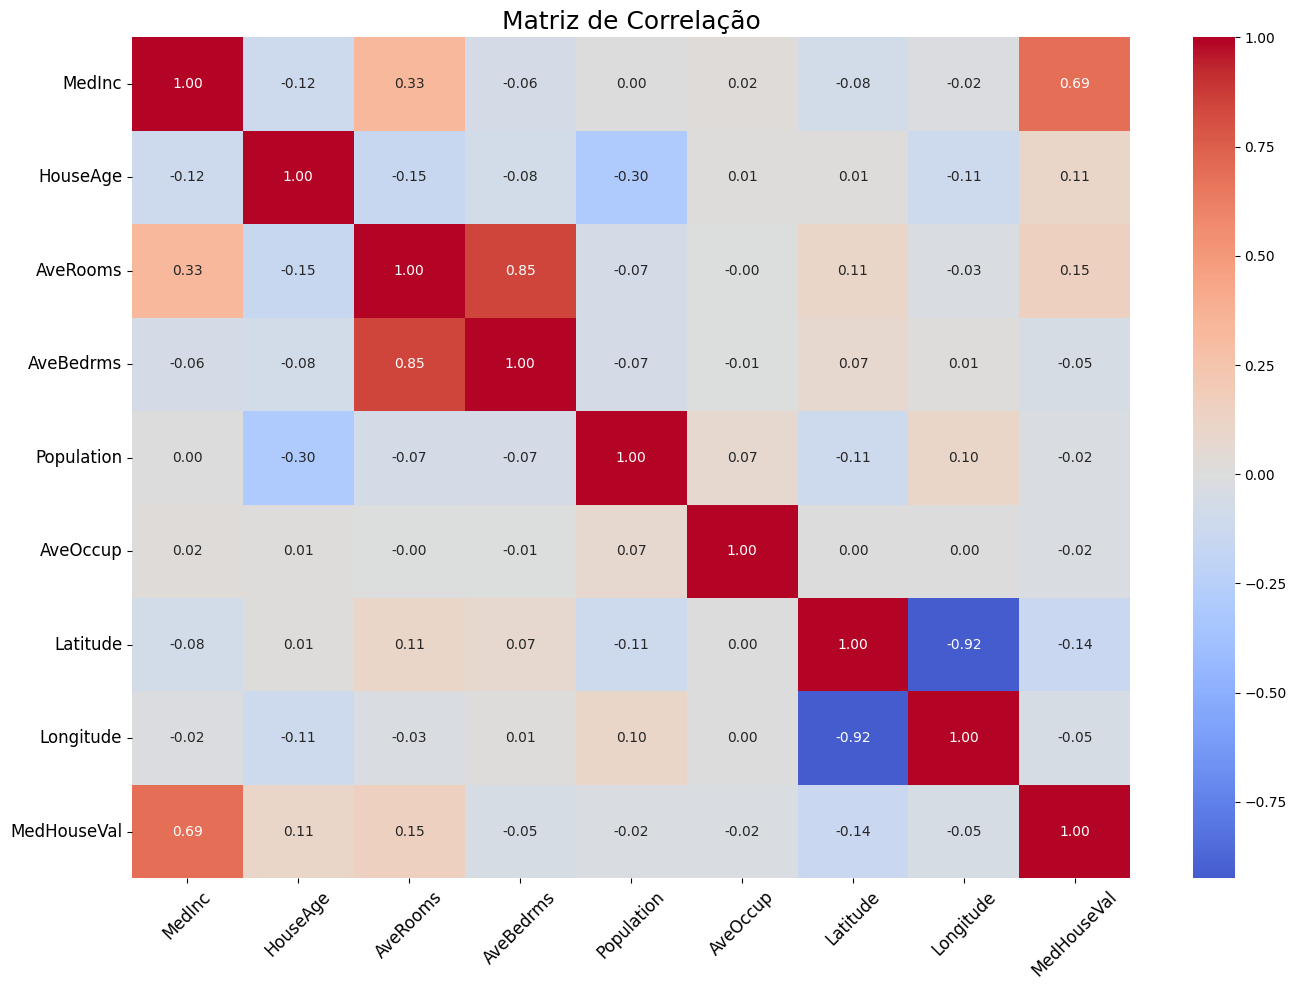

In [ ]:
# Matriz de correlação - Figura ampliada
plt.figure(figsize=(14, 10))
correlation_matrix = df_housing.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlação', fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Análise das correlações com a variável alvo
correlations = df_housing.corr()['MedHouseVal'].sort_values(ascending=False)
print("Correlações com o valor médio das casas:")
print(correlations)

Correlações com o valor médio das casas:
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


## Seleção e Transformação de Variáveis

In [ ]:
# Identificando as variáveis mais correlacionadas com o preço
correlation_with_target = df_housing.corr()['MedHouseVal'].abs().sort_values(ascending=False)
selected_features = correlation_with_target.index[1:6]  # Top 5 variáveis mais correlacionadas
print("Variáveis selecionadas:", list(selected_features))
print("Correlações:")
for feature in selected_features:
    corr_value = df_housing.corr()['MedHouseVal'][feature]
    print(f"{feature}: {corr_value:.3f}")

Variáveis selecionadas: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge', 'AveBedrms']
Correlações:
MedInc: 0.688
AveRooms: 0.152
Latitude: -0.144
HouseAge: 0.106
AveBedrms: -0.047


In [ ]:
# Preparação dos dados
from sklearn.preprocessing import StandardScaler

X = df_housing[selected_features]
y = df_housing['MedHouseVal']

In [ ]:
# Normalizando as variáveis preditoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Convertendo de volta para DataFrame para facilitar a interpretação
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

## Treinamento do Modelo e Validação Cruzada

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score

# Criando o modelo
model = LinearRegression()

# Validação cruzada com múltiplas métricas
scoring = ['neg_mean_squared_error', 'r2']
cv_results = cross_validate(model, X_scaled, y, cv=5, scoring=scoring)

# Calculando RMSE a partir do MSE
rmse_scores = np.sqrt(-cv_results['test_neg_mean_squared_error'])
r2_scores = cv_results['test_r2']

print("Resultados da Validação Cruzada:")
print(f"RMSE por fold: {rmse_scores}")
print(f"RMSE médio: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
print(f"R² por fold: {r2_scores}")
print(f"R² médio: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")

Resultados da Validação Cruzada:
RMSE por fold: [0.7165557  0.80841543 0.83148336 0.83242025 0.81470175]
RMSE médio: 0.8007 ± 0.0431
R² por fold: [0.52204661 0.44169136 0.5193953  0.40936525 0.54449778]
R² médio: 0.4874 ± 0.0523


In [ ]:
# Treinando o modelo final com todos os dados para análise dos coeficientes
model.fit(X_scaled, y)
print("\nCoeficientes do modelo:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercepto: {model.intercept_:.4f}")


Coeficientes do modelo:
MedInc: 0.9998
AveRooms: -0.4888
Latitude: -0.0677
HouseAge: 0.2012
AveBedrms: 0.4428
Intercepto: 2.0686


# Modelo 2: Regressão Logística — Previsão de Sobrevivência no Titanic


## Carregamento e Exploração dos Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset Titanic do Seaborn
df_titanic = sns.load_dataset('titanic')

# Visualizando as primeiras linhas
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Informações gerais do dataset
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Análise Exploratória dos Dados

In [ ]:
# Estatísticas descritivas
df_titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


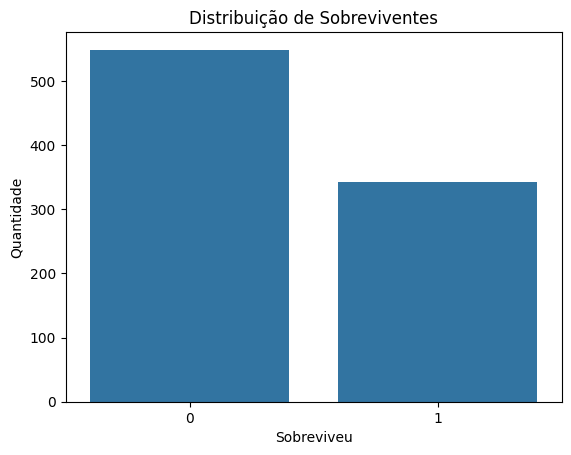

In [ ]:
# Distribuição da variável alvo
sns.countplot(x='survived', data=df_titanic)
plt.title('Distribuição de Sobreviventes')
plt.xlabel('Sobreviveu')
plt.ylabel('Quantidade')
plt.show()

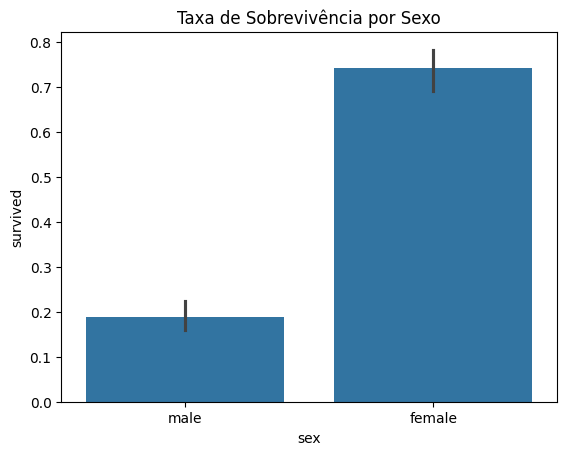

In [ ]:
# Taxa de sobrevivência por sexo
sns.barplot(x='sex', y='survived', data=df_titanic)
plt.title('Taxa de Sobrevivência por Sexo')
plt.show()

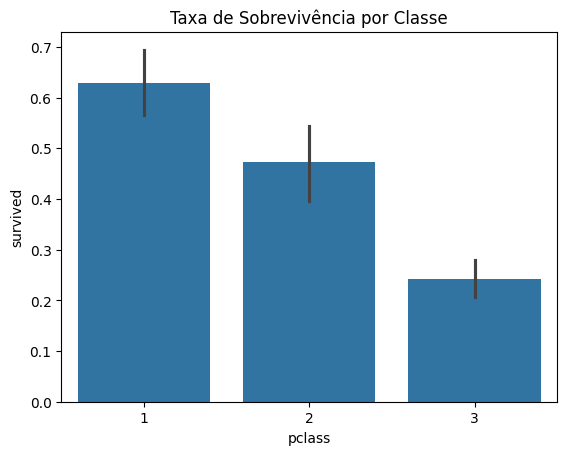

In [ ]:
# Taxa de sobrevivência por classe
sns.barplot(x='pclass', y='survived', data=df_titanic)
plt.title('Taxa de Sobrevivência por Classe')
plt.show()

## Seleção e Transformação de Variáveis

In [ ]:
# Seleção de variáveis e tratamento de valores ausentes
df_titanic_model = df_titanic[['pclass', 'sex', 'age', 'fare', 'survived']].dropna()

# Transformação de variáveis categóricas
df_titanic_model = pd.get_dummies(df_titanic_model, columns=['sex'], drop_first=True)

X = df_titanic_model.drop('survived', axis=1)
y = df_titanic_model['survived']

## Treinamento do Modelo e Validação Cruzada

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Padronização das variáveis preditoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criação e avaliação do modelo
model = LogisticRegression(max_iter=1000, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

print("Resultados da Validação Cruzada:")
print(f"Acurácia por fold: {scores}")
print(f"Acurácia média: {scores.mean():.4f} ± {scores.std():.4f}")

Resultados da Validação Cruzada:
Acurácia por fold: [0.74825175 0.82517483 0.78321678 0.75524476 0.8028169 ]
Acurácia média: 0.7829 ± 0.0288


In [ ]:
  # Treinando o modelo final com todos os dados para análise dos coeficientes
  model.fit(X_scaled, y)
  print("\nCoeficientes do modelo:")
  for feature, coef in zip(X.columns, model.coef_[0]):
      print(f"{feature}: {coef:.4f}")
  print(f"Intercepto: {model.intercept_[0]:.4f}")


Coeficientes do modelo:
pclass: -1.0386
age: -0.5185
fare: 0.0375
sex_male: -1.1977
Intercepto: -0.5174


# Modelo 3: Árvore de Decisão — Classificação de Espécies de Flores (Iris)

## Carregamento e Exploração dos Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Carregando o dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

# Mapeando os números para nomes das espécies
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_iris['species_name'] = df_iris['species'].map(species_names)

# Visualizando as primeiras linhas
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# Informações gerais do dataset
print("Formato do dataset:", df_iris.shape)
print("\nDescrição das variáveis:")
print(iris.DESCR)

Formato do dataset: (150, 6)

Descrição das variáveis:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: Non

## Análise Exploratória dos Dados

In [ ]:
# Estatísticas descritivas
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Verificando valores ausentes
print("Valores ausentes por variável:")
print(df_iris.isnull().sum())

Valores ausentes por variável:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


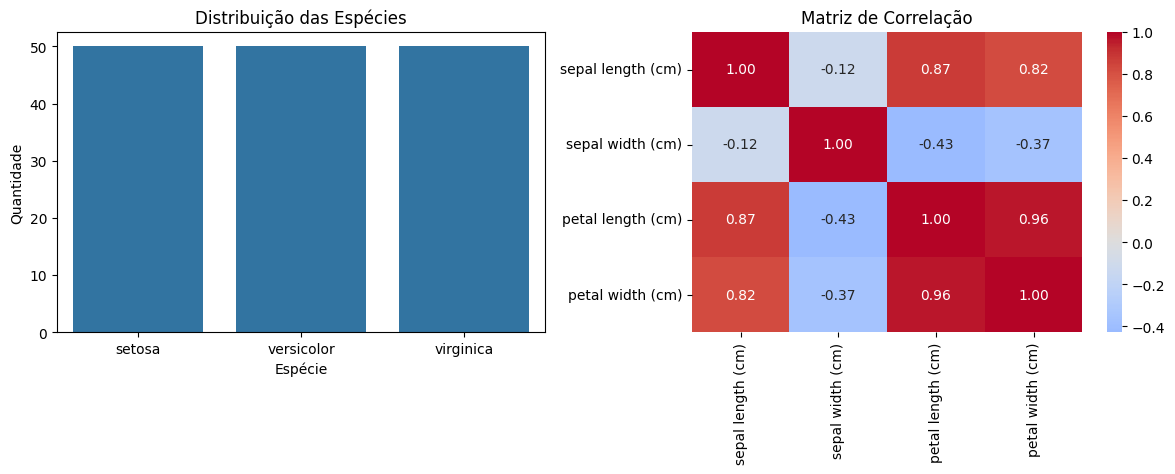

In [ ]:
# Distribuição das espécies
plt.figure(figsize=(12, 8))

# Distribuição da variável alvo
plt.subplot(2, 2, 1)
sns.countplot(x='species_name', data=df_iris)
plt.title('Distribuição das Espécies')
plt.xlabel('Espécie')
plt.ylabel('Quantidade')

# Matriz de correlação
plt.subplot(2, 2, 2)
correlation_matrix = df_iris.drop(['species', 'species_name'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlação')

# Pairplot para visualizar separabilidade das classes
plt.tight_layout()
plt.show()

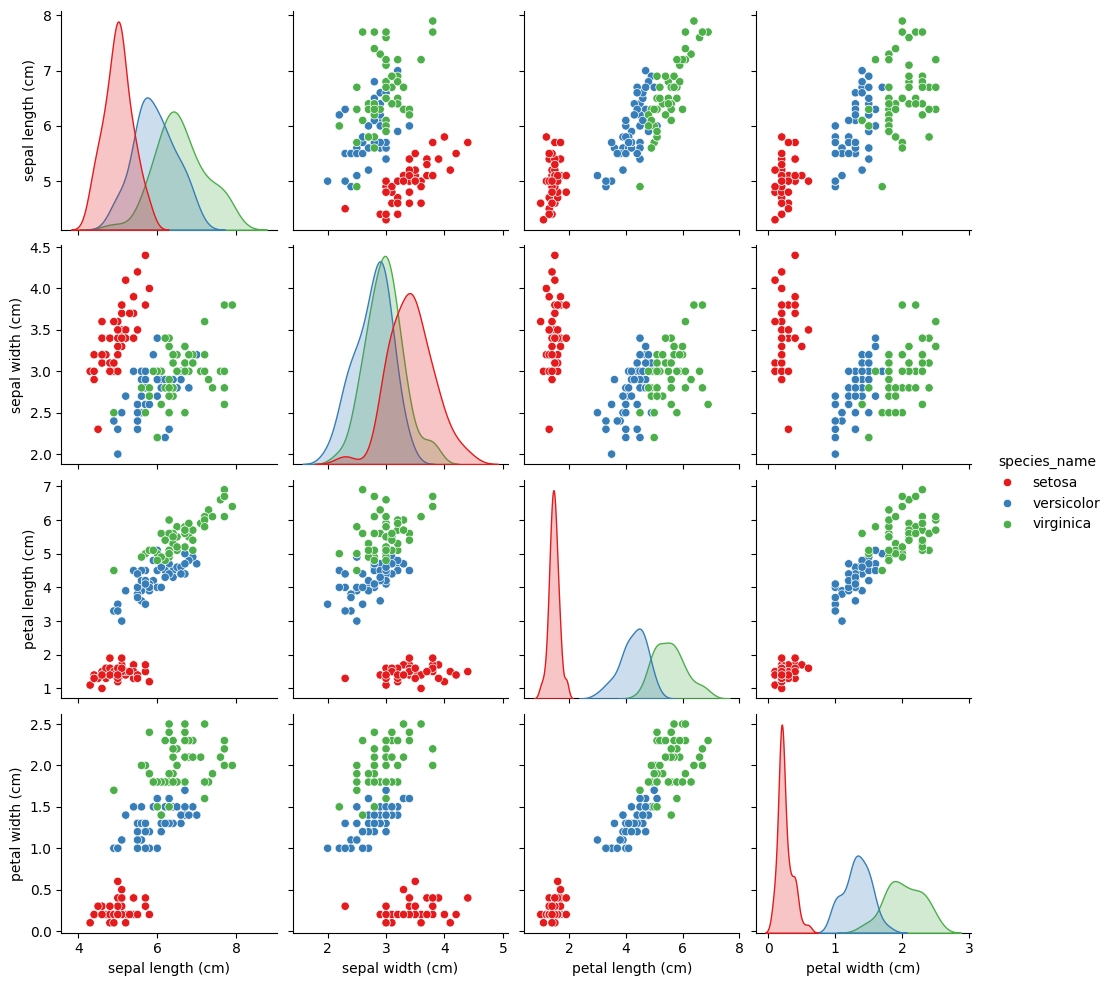

In [ ]:
# Pairplot detalhado
sns.pairplot(df_iris.drop('species', axis=1), hue='species_name', palette='Set1')
plt.show()

In [ ]:
# Análise das correlações
correlations = df_iris.drop(['species', 'species_name'], axis=1).corr()
print("Matriz de correlação entre as variáveis:")
print(correlations)

Matriz de correlação entre as variáveis:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


## Seleção e Transformação de Variáveis

In [ ]:
# Preparação dos dados
X = df_iris.drop(['species', 'species_name'], axis=1)
y = df_iris['species']

print("Variáveis preditoras:")
print(X.columns.tolist())
print("\nClasses alvo:")
print(f"0: {species_names[0]}, 1: {species_names[1]}, 2: {species_names[2]}")

Variáveis preditoras:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Classes alvo:
0: setosa, 1: versicolor, 2: virginica


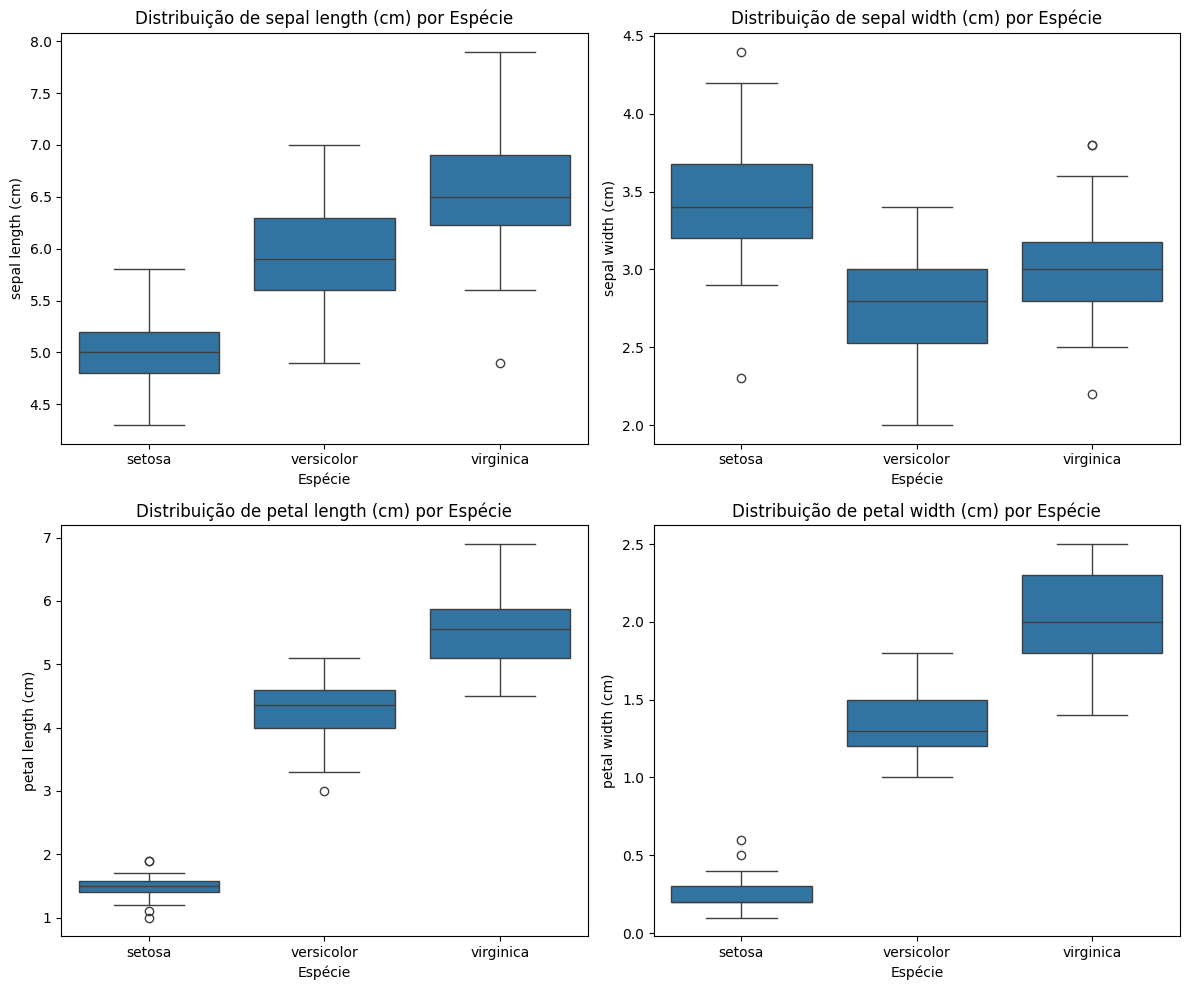

In [ ]:
# Análise da importância das variáveis através de boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = X.columns

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    sns.boxplot(x='species_name', y=feature, data=df_iris, ax=ax)
    ax.set_title(f'Distribuição de {feature} por Espécie')
    ax.set_xlabel('Espécie')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

## Treinamento do Modelo e Validação Cruzada

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Criação e avaliação do modelo
model = DecisionTreeClassifier(max_depth=3, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Resultados da Validação Cruzada:")
print(f"Acurácia por fold: {scores}")
print(f"Acurácia média: {scores.mean():.4f} ± {scores.std():.4f}")

Resultados da Validação Cruzada:
Acurácia por fold: [0.96666667 0.96666667 0.93333333 1.         1.        ]
Acurácia média: 0.9733 ± 0.0249


In [ ]:
# Treinando o modelo final com todos os dados para análise da importância das variáveis
model.fit(X, y)
print("\nImportância das variáveis:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Importância das variáveis:
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.5856
petal width (cm): 0.4144


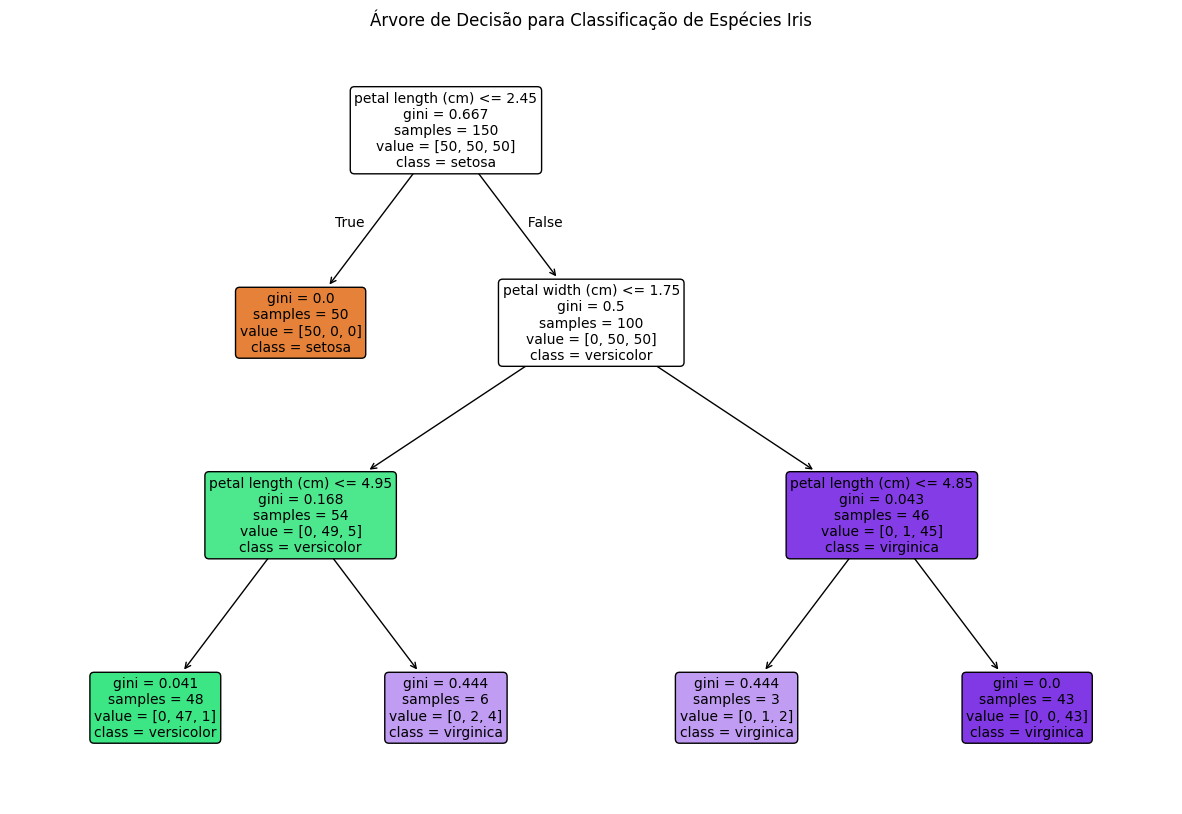

In [ ]:
# Visualizando a árvore de decisão
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=list(species_names.values()),
          filled=True, rounded=True, fontsize=10)
plt.title('Árvore de Decisão para Classificação de Espécies Iris')
plt.show()

# Modelo 4: Rede Neural — Classificação da Qualidade do Vinho

## Carregamento e Exploração dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset Wine Quality
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df_wine = pd.read_csv(url, sep=';')

# Visualizando as primeiras linhas
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Informações gerais do dataset
print("Formato do dataset:", df_wine.shape)
print("\nColunas:", df_wine.columns.tolist())

Formato do dataset: (1599, 12)

Colunas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## Análise Exploratória dos Dados

In [3]:
# Estatísticas descritivas
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Verificando valores ausentes
print("Valores ausentes por variável:")
print(df_wine.isnull().sum())

Valores ausentes por variável:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


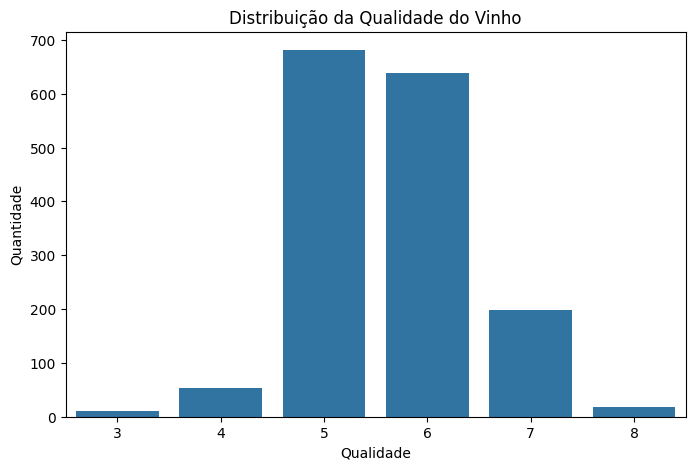

In [5]:
# Distribuição da variável alvo
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df_wine)
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')
plt.show()

## Seleção e Transformação de Variáveis

In [6]:
# Transformando a variável alvo em binária
df_wine['good_quality'] = (df_wine['quality'] >= 7).astype(int)

X = df_wine.drop(['quality', 'good_quality'], axis=1)
y = df_wine['good_quality']

# Normalizando as variáveis preditoras
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Treinamento do Modelo e Validação Cruzada

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Criação e avaliação do modelo
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

print("Resultados da Validação Cruzada:")
print(f"Acurácia por fold: {scores}")
print(f"Acurácia média: {scores.mean():.4f} ± {scores.std():.4f}")

Resultados da Validação Cruzada:
Acurácia por fold: [0.871875   0.8625     0.875      0.825      0.86833856]
Acurácia média: 0.8605 ± 0.0183


In [8]:
# Treinando o modelo final com todos os dados para análise dos coeficientes
model.fit(X_scaled, y)
print("\nPesos da primeira camada oculta (parcial):")
print(model.coefs_[0][:, :5])  # Exibe parte dos pesos para não poluir a saída


Pesos da primeira camada oculta (parcial):
[[ 0.18158808  0.56623028  0.14862857 -0.06776062 -0.57955696]
 [-0.33636397  0.40253626  0.66107156  0.02648922 -0.10120649]
 [ 0.26207206 -0.30770111 -0.38216314 -0.4036725  -0.14083646]
 [ 0.47437454 -0.4769885  -0.56708876  0.14502031  0.23401994]
 [-0.6907807  -0.09782179 -0.5136325   0.33049884 -0.17051537]
 [ 0.67359086  0.32555191  0.28021745  0.26716329  0.04244085]
 [-0.13400112  0.08389585  0.32559691  0.16467024 -0.16130299]
 [ 0.21769564 -0.17307063 -0.53179919  0.51523592  0.30861398]
 [-0.04099989  0.27274168 -0.14803584 -0.41914055 -0.02325838]
 [-0.08570221  0.29615178  0.01492162  0.22731816  0.10374377]
 [-0.32777423  0.16901514 -0.39891602 -0.25836174  0.16609768]]
